## 🤖 **Parte 2 — Modelado y Evaluación**
### 🎯 **Objetivo**
Entrenar un modelo de regresión para predecir la variable `price`.

## 1) Cargamos los datos

In [1]:
from funpymodeling.exploratory import status, freq_tbl
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import OneHotEncoder

Levantamos la base que dejamos limpia en la parte 1

In [2]:
df_clean = pd.read_csv('/Users/Usuario/Desktop/DATOS VIVOS/TP FINAL/dataset/processed.csv')
df_clean.head(4)

,state_name,place_name,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,price
0,Capital Federal,Almagro,3.0,2.0,2.0,77.0,67.0,Departamento,235500.0
1,Capital Federal,Villa Urquiza,2.0,1.0,1.0,60.0,55.0,Departamento,175000.0
2,Capital Federal,Boedo,2.0,1.0,1.0,74.0,47.0,PH,140000.0
3,Capital Federal,Almagro,3.0,2.0,1.0,66.0,64.0,Departamento,173000.0


## Analizamos las variables

In [3]:
status(df_clean)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,state_name,0,0.0,0,0.00000,4,object
1,place_name,0,0.0,0,0.00000,90,object
2,rooms,0,0.0,0,0.00000,6,float64
3,bedrooms,0,0.0,0,0.00000,7,float64
4,bathrooms,0,0.0,0,0.00000,4,float64
5,surface_total,0,0.0,0,0.00000,907,float64
6,surface_covered,0,0.0,0,0.00000,423,float64
7,property_type,0,0.0,0,0.00000,3,object
8,price,0,0.0,3,0.00002,6269,float64


Análisis de Variables Numéricas

array([[<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'surface_total'}>],
       [<Axes: title={'center': 'surface_covered'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

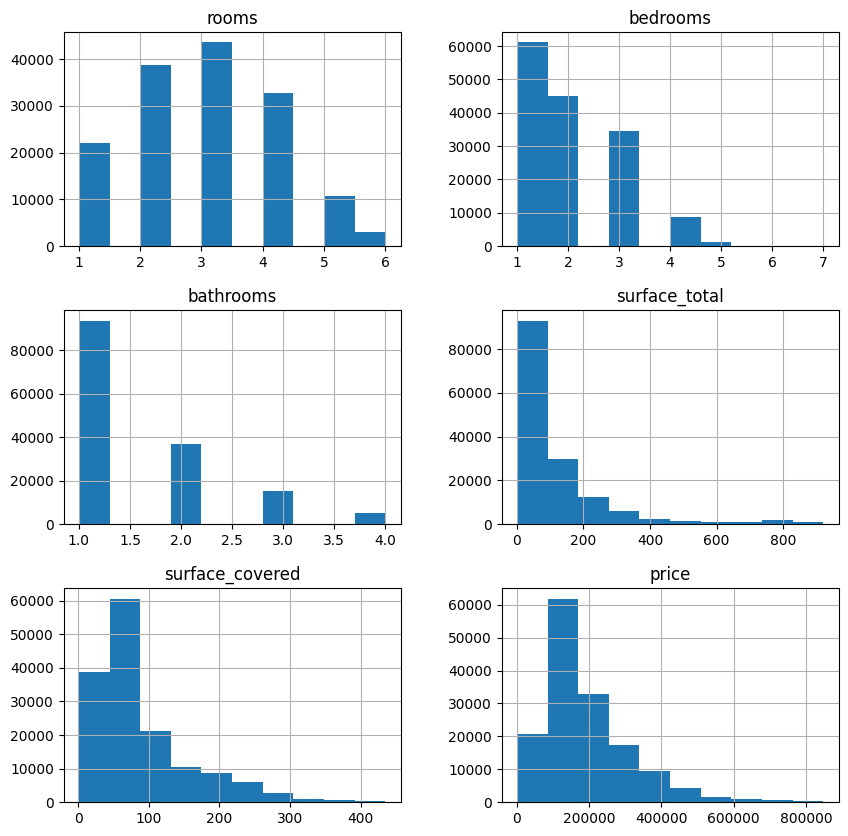

In [4]:
df_clean.hist(figsize = (10,10))

Análisis de Variables Categóricas
-state_name
-place_name
-property_type

In [5]:
# state_name
print(f"\nState_name - Valores únicos: {df_clean['state_name'].nunique()}")
print("Distribución:")
for state, count in df_clean['state_name'].value_counts().items():
    percentage = (count / len(df_clean)) * 100
    print(f"   • {state}: {count:,} propiedades ({percentage:.1f}%)")

# place_name - análisis de cardinalidad
print(f"\nPlace_name - Cardinalidad: {df_clean['place_name'].nunique()} valores únicos")

# property_type
print(f"\nProperty_type - Valores únicos: {df_clean['property_type'].nunique()}")
print("Distribución:")
for tipo, count in df_clean['property_type'].value_counts().items():
    percentage = (count / len(df_clean)) * 100
    print(f"   • {tipo}: {count:,} propiedades ({percentage:.1f}%)")


State_name - Valores únicos: 4
Distribución:
   • Capital Federal: 78,576 propiedades (52.1%)
   • Bs.As. G.B.A. Zona Norte: 41,471 propiedades (27.5%)
   • Bs.As. G.B.A. Zona Sur: 15,581 propiedades (10.3%)
   • Bs.As. G.B.A. Zona Oeste: 15,071 propiedades (10.0%)

Place_name - Cardinalidad: 90 valores únicos

Property_type - Valores únicos: 3
Distribución:
   • Departamento: 97,359 propiedades (64.6%)
   • Casa: 40,706 propiedades (27.0%)
   • PH: 12,634 propiedades (8.4%)


In [6]:
# Creo una copia
df_clean_encoded = df_clean.copy()

 ✔ Place_name cuanta con alta cardinalidad, por lo que hacemos Frequency Encoding que calcula la frecuencia relativa de cada place_name.
 
 ✔ state_name y Property_type cuentan con baja cardinalidad , 4 valores unicos y 3 respectivamente por lo que hacemos 

In [7]:
# Frequency Encoding con place_name

place_name_freq = df_clean_encoded['place_name'].value_counts(normalize=True)
df_clean_encoded['place_name_freq'] = df_clean_encoded['place_name'].map(place_name_freq)

print(f" ✔ Frequency Encoding aplicado a place_name")
print(f"   Ejemplo: { df_clean_encoded['place_name_freq'].iloc[0]:.4f}")

# One-Hot Encoding para property_type
property_ohe = OneHotEncoder(sparse_output=False, drop='first')
property_encoded = property_ohe.fit_transform(df_clean_encoded[['property_type']])
property_columns = [f"property_{cat}" for cat in property_ohe.categories_[0][1:]]

property_encoded_df = pd.DataFrame(
    property_encoded,
    columns=property_columns,
    index=df_clean_encoded.index
)

print(f" ✔ One-Hot Encoding aplicado a property_type")
print(f"   Nuevas Columnas: {property_columns}")

# One-Hot Encoding para state_name
state_ohe = OneHotEncoder(sparse_output=False, drop='first')
state_encoded = state_ohe.fit_transform(df_clean_encoded[['state_name']])
state_columns = [f"state_{cat}" for cat in state_ohe.categories_[0][1:]]

state_encoded_df = pd.DataFrame(
    state_encoded,
    columns=state_columns,
    index=df_clean_encoded.index
)

print(f"  ✔ One-Hot Encoding aplicado a state_name")
print(f"   Nuevas Columnas: {state_columns}")

# Combinar todo en un dataset final
df_clean_final = pd.concat([
    df_clean_encoded[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'place_name_freq', 'price']],
    property_encoded_df,
    state_encoded_df
], axis=1)

print(f"\n DATASET FINAL PARA MODELAR:")
print(f"   Tamaño de la base: {df_clean_final.shape}")
print(f"   Detalle de Columnas: {list(df_clean_final.columns)}")

 ✔ Frequency Encoding aplicado a place_name
   Ejemplo: 0.0499
 ✔ One-Hot Encoding aplicado a property_type
   Nuevas Columnas: ['property_Departamento', 'property_PH']
  ✔ One-Hot Encoding aplicado a state_name
   Nuevas Columnas: ['state_Bs.As. G.B.A. Zona Oeste', 'state_Bs.As. G.B.A. Zona Sur', 'state_Capital Federal']

 DATASET FINAL PARA MODELAR:
   Tamaño de la base: (150699, 12)
   Detalle de Columnas: ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'place_name_freq', 'price', 'property_Departamento', 'property_PH', 'state_Bs.As. G.B.A. Zona Oeste', 'state_Bs.As. G.B.A. Zona Sur', 'state_Capital Federal']


In [8]:
df_clean_final.head(5)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,place_name_freq,price,property_Departamento,property_PH,state_Bs.As. G.B.A. Zona Oeste,state_Bs.As. G.B.A. Zona Sur,state_Capital Federal
0,3.0,2.0,2.0,77.0,67.0,0.049874,235500.0,1.0,0.0,0.0,0.0,1.0
1,2.0,1.0,1.0,60.0,55.0,0.021699,175000.0,1.0,0.0,0.0,0.0,1.0
2,2.0,1.0,1.0,74.0,47.0,0.005893,140000.0,0.0,1.0,0.0,0.0,1.0
3,3.0,2.0,1.0,66.0,64.0,0.049874,173000.0,1.0,0.0,0.0,0.0,1.0
4,3.0,2.0,1.0,55.0,55.0,0.049874,155000.0,0.0,1.0,0.0,0.0,1.0


In [9]:
status(df_clean_final)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,rooms,0,0.0,0,0.000000,6,float64
1,bedrooms,0,0.0,0,0.000000,7,float64
2,bathrooms,0,0.0,0,0.000000,4,float64
3,surface_total,0,0.0,0,0.000000,907,float64
4,surface_covered,0,0.0,0,0.000000,423,float64
5,place_name_freq,0,0.0,0,0.000000,88,float64
6,price,0,0.0,3,0.000020,6269,float64
7,property_Departamento,0,0.0,53340,0.353951,2,float64
8,property_PH,0,0.0,138065,0.916164,2,float64
9,state_Bs.As. G.B.A. Zona Oeste,0,0.0,135628,0.899993,2,float64


In [10]:
df_clean_final.columns

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'place_name_freq', 'price', 'property_Departamento', 'property_PH',
       'state_Bs.As. G.B.A. Zona Oeste', 'state_Bs.As. G.B.A. Zona Sur',
       'state_Capital Federal'],
      dtype='object')

Guardo los Bins con pickle

Se guarda todo en la carpeta model 

In [11]:

import pickle
# Guardar los encoders y mapeos con pickle
#Frequency encoder para place_name
with open('C:/Users/Usuario/Desktop/datos Vivos/TP FINAL/model/place_name_freq.pkl', 'wb') as f:
    pickle.dump(place_name_freq, f)
#OneHot encoder para property_type
with open('C:/Users/Usuario/Desktop/datos Vivos/TP FINAL/model/property_ohe.pkl', 'wb') as f:
    pickle.dump(property_ohe, f)
# OneHot encoder para state_name
with open('C:/Users/Usuario/Desktop/datos Vivos/TP FINAL/model/state_ohe.pkl', 'wb') as f:
    pickle.dump(state_ohe, f)

# Guardar lista de columnas finales
feature_columns = list(df_clean_final.drop('price', axis=1).columns)
with open('C:/Users/Usuario/Desktop/datos Vivos/TP FINAL/model/feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)


Analisis de datos

In [12]:
df_clean_final.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,place_name_freq,price,property_Departamento,property_PH,state_Bs.As. G.B.A. Zona Oeste,state_Bs.As. G.B.A. Zona Sur,state_Capital Federal
count,150699.000000,150699.00000,150699.000000,150699.000000,150699.000000,150699.000000,150699.000000,150699.000000,150699.000000,150699.000000,150699.000000,150699.000000
mean,2.869953,1.96641,1.547595,128.234885,90.351409,0.034912,191772.284919,0.646049,0.083836,0.100007,0.103392,0.521410
std,1.226116,0.97229,0.808501,149.398654,67.956291,0.028231,121003.933249,0.478196,0.277143,0.300011,0.304471,0.499543
min,1.000000,1.00000,1.000000,1.000000,1.000000,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.00000,1.000000,48.000000,44.000000,0.011500,105000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.00000,1.000000,74.000000,65.000000,0.031341,158000.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.00000,2.000000,137.000000,110.000000,0.046417,248000.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,6.000000,7.00000,4.000000,920.000000,435.000000,0.093836,848000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modelos

In [13]:
import pandas as pd
print(f"Variables predictoras: {list(df_clean_final.drop(columns=['price']).columns)}")
print(f"Variable objetivo: price")
# Verificar tipos de datos
print(df_clean_final.dtypes)

Variables predictoras: ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'place_name_freq', 'property_Departamento', 'property_PH', 'state_Bs.As. G.B.A. Zona Oeste', 'state_Bs.As. G.B.A. Zona Sur', 'state_Capital Federal']
Variable objetivo: price
rooms                             float64
bedrooms                          float64
bathrooms                         float64
surface_total                     float64
surface_covered                   float64
place_name_freq                   float64
price                             float64
property_Departamento             float64
property_PH                       float64
state_Bs.As. G.B.A. Zona Oeste    float64
state_Bs.As. G.B.A. Zona Sur      float64
state_Capital Federal             float64
dtype: object


In [16]:
!pip install  xgboost


[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


📊 Resultados de evaluación:

                                   MAE       RMSE     R2
2.Random Forest default      29698.585  50856.683  0.825
3.Random Forest 50 arboles   29849.525  51126.044  0.823
4.Random Forest 200 arboles  31809.801  51501.985  0.820
5.XGBoost                    35174.927  53469.848  0.806
1.Linear Regression          48890.242  69660.895  0.671

✅ Mejor modelo: 2.Random Forest default


c:\Users\Usuario\Desktop\datos Vivos\TP7\tp\datosvivos\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\Desktop\datos Vivos\TP7\tp\datosvivos\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\Desktop\datos Vivos\TP7\tp\datosvivos\lib\site-packages\seaborn\relational.py:441: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby

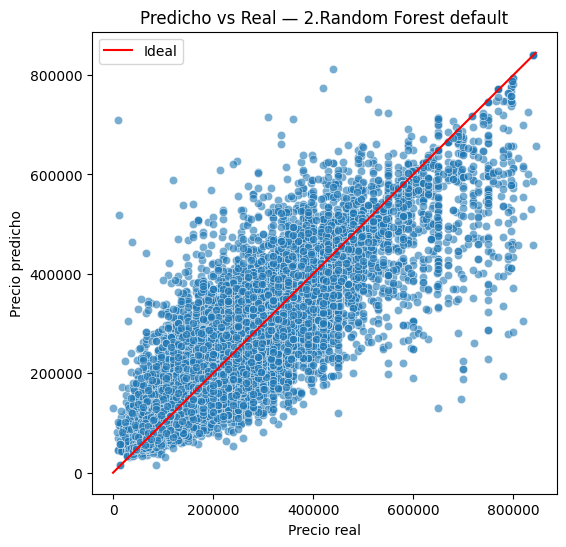

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# 1️⃣ Separar features y variable target
# =====================================
X = df_clean_final.drop(columns=['price'])
y = df_clean_final['price']

# =====================================
# 2️⃣ Dividir en train/test
##Uso el 30% para el teste porque es lo que venimos usando en la clase
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# =====================================
# 3️⃣ Inicializar modelos
# =====================================
models = {
    "1.Linear Regression": LinearRegression(),
    "2.Random Forest default": RandomForestRegressor( random_state=42,n_jobs=-1),
    "3.Random Forest 50 arboles": RandomForestRegressor(n_estimators=50, random_state=42,n_jobs=-1),
    "4.Random Forest 200 arboles": RandomForestRegressor(n_estimators=200,#Número de árboles que tendrá el bosque
    max_depth=25,#Limita cuántas divisiones puede hacer un árbol → evita sobreajuste (overfitting)
    min_samples_split=10,#Número mínimo de muestras requeridas para dividir un nodo.→ controla la complejidad del modelo.
    min_samples_leaf=5,#Mínimo número de muestras que debe tener cada hoja fina. ayuda a generalizar mejor.
    random_state=42,
    n_jobs=-1),#Usa todos los núcleos del CPU disponibles.
    "5.XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
}

# =====================================
# 4️⃣ Entrenar, predecir y evaluar
# =====================================
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }

# =====================================
# 5️⃣ Mostrar resultados comparativos
# =====================================
results_df = pd.DataFrame(results).T.sort_values("RMSE")
print("📊 Resultados de evaluación:\n")
print(results_df.round(3))

# =====================================
# 6️⃣ Seleccionar el mejor modelo
# =====================================
best_model_name = results_df.index[0]
best_model = models[best_model_name]
print(f"\n✅ Mejor modelo: {best_model_name}")

# =====================================
# 7️⃣ Gráfico Predicho vs Real
# =====================================
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', label='Ideal')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title(f"Predicho vs Real — {best_model_name}")
plt.legend()
plt.show()


Trato de mejorar los valores con Optimización de hiperparámetros (GridSearch o RandomizedSearch)

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.5]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,           # número de combinaciones a probar
    cv=3,                # validación cruzada
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("🔍 Mejor combinación encontrada:")
print(random_search.best_params_)

best_rf = random_search.best_estimator_


c:\Users\Usuario\Desktop\datos Vivos\TP7\tp\datosvivos\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
24 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuario\Desktop\datos Vivos\TP7\tp\datosvivos\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuario\Desktop\datos Vivos\TP7\tp\datosvivos\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\Usuario\Desktop\datos Vivos\TP7\tp\datosvivos\lib\site-packages\sklearn\base.py"

🔍 Mejor combinación encontrada:
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 40}


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, min_samples_split=5, 
                           min_samples_leaf=1,max_features=0.5, max_depth=40,
                        random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest → MAE: {mae_rf:.2f} | RMSE: {rmse_rf:.2f} | R²: {r2_rf:.3f}")


Random Forest → MAE: 30119.41 | RMSE: 50144.13 | R²: 0.830


Si bien mejora un poco el R2 , el MAE empeora, por lo que trato de volver a sacar outlier en la variable precio

In [21]:
q_low = df_clean_final['price'].quantile(0.01)
q_high = df_clean_final['price'].quantile(0.99)
df_filtered = df_clean_final[(df_clean_final['price'] > q_low) & (df_clean_final['price'] < q_high)]


📊 Resultados de evaluación:

                                                MAE       RMSE     R2
6.Random Forest Optimizado (400 árboles)  28381.746  45088.038  0.829
2.Random Forest default                   27907.153  45507.288  0.826
3.Random Forest 50 arboles                28001.490  45664.551  0.825
4.Random Forest 200 arboles               29924.456  46265.503  0.820
5.XGBoost                                 33039.824  48012.879  0.806
1.Linear Regression                       46933.202  64411.464  0.651

✅ Mejor modelo: 6.Random Forest Optimizado (400 árboles)


c:\Users\Usuario\Desktop\datos Vivos\TP7\tp\datosvivos\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\Desktop\datos Vivos\TP7\tp\datosvivos\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\Desktop\datos Vivos\TP7\tp\datosvivos\lib\site-packages\seaborn\relational.py:441: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby

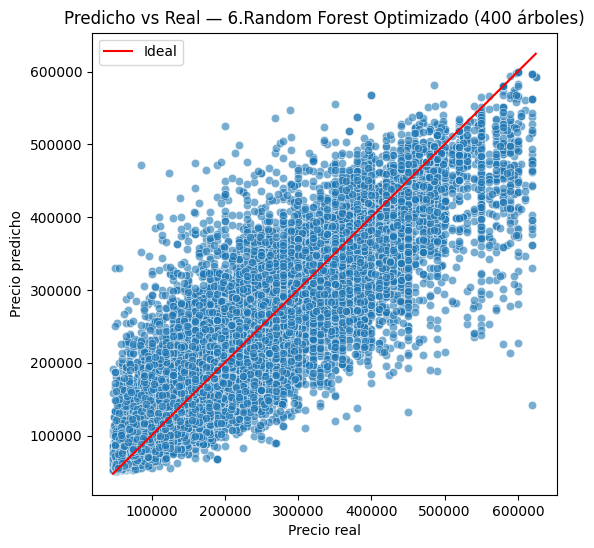

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# 1️⃣ Separar features y variable target
# =====================================
X = df_filtered.drop(columns=['price'])
y = df_filtered['price']

# =====================================
# 2️⃣ Dividir en train/test
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# =====================================
# 3️⃣ Inicializar modelos
# =====================================
models = {
    "1.Linear Regression": LinearRegression(),
    "2.Random Forest default": RandomForestRegressor( random_state=42,n_jobs=-1),
    "3.Random Forest 50 arboles": RandomForestRegressor(n_estimators=50, random_state=42,n_jobs=-1),
    "4.Random Forest 200 arboles": RandomForestRegressor(n_estimators=200,#Número de árboles que tendrá el bosque
                                        max_depth=25,#Limita cuántas divisiones puede hacer un árbol → evita sobreajuste (overfitting)
                                        min_samples_split=10,#Número mínimo de muestras requeridas para dividir un nodo.→ controla la complejidad del modelo.
                                        min_samples_leaf=5,#Mínimo número de muestras que debe tener cada hoja fina. ayuda a generalizar mejor.
                                        random_state=42,
                                        n_jobs=-1),#Usa todos los núcleos del CPU disponibles.
    "5.XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42),
    "6.Random Forest Optimizado (400 árboles)": RandomForestRegressor(n_estimators=400, min_samples_split=5, 
                                    min_samples_leaf=1,max_features=0.5, max_depth=40,
                                    random_state=42,n_jobs=-1),
}

# =====================================
# 4️⃣ Entrenar, predecir y evaluar
# =====================================
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }

# =====================================
# 5️⃣ Mostrar resultados comparativos
# =====================================
results_df = pd.DataFrame(results).T.sort_values("RMSE")
print("📊 Resultados de evaluación:\n")
print(results_df.round(3))

# =====================================
# 6️⃣ Seleccionar el mejor modelo
# =====================================
best_model_name = results_df.index[0]
best_model = models[best_model_name]
print(f"\n✅ Mejor modelo: {best_model_name}")

# =====================================
# 7️⃣ Gráfico Predicho vs Real
# =====================================
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', label='Ideal')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title(f"Predicho vs Real — {best_model_name}")
plt.legend()
plt.show()


In [ ]:

#Random Forest Optimizado sin outlier(400 árboles)
from sklearn.ensemble import RandomForestRegressor
# =====================================
# 1️⃣ Separar features y variable target
# =====================================
X_F = df_filtered.drop(columns=['price'])
y_F = df_filtered['price']

# =====================================
# 2️⃣ Dividir en train/test
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X_F , y_F, test_size=0.3, random_state=42
)
rf_opt_limpio = RandomForestRegressor(n_estimators=400, min_samples_split=5, 
                                     min_samples_leaf=1,max_features=0.5, max_depth=40,
                                    random_state=42)
rf_opt_limpio.fit(X_train, y_train)
y_pred_rf = rf_opt_limpio.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest → MAE: {mae_rf:.2f} | RMSE: {rmse_rf:.2f} | R²: {r2_rf:.3f}")

Random Forest → MAE: 28381.75 | RMSE: 45088.04 | R²: 0.829


## Guardo el modelo en pkl

In [29]:

# Guardar en el disco /content/drive/MyDrive/EDVAI/model
filename = 'C:/Users/Usuario/Desktop/datos Vivos/TP FINAL/model/rf_opt_limpio.pkl'
pickle.dump(rf_opt_limpio, open(filename, 'wb')) 

## Conclusiones

In [30]:
# ============================================
# 🔹 Conclusión final del proceso de modelado
# ============================================

import pandas as pd

# Resultados consolidados
resultados = pd.DataFrame({
    'Modelo': [
        'Linear Regression',
        'Random Forest default',
        'Random Forest 50 árboles',
        'Random Forest 200 árboles',
        'XGBoost',
        'Random Forest Optimizado (400 árboles)',
        'Random Forest Optimizado + Sin Outliers'
    ],
    'MAE': [
        48890.242, 29698.585, 29849.525, 31809.801, 35174.927, 30119.41, 28381.746
    ],
    'RMSE': [
        69660.895, 50856.683, 51126.044, 51501.985, 53469.848, 50144.13, 45088.038
    ],
    'R²': [
        0.671, 0.825, 0.823, 0.820, 0.806, 0.830, 0.829
    ]
})

# Relación RMSE/MAE (para medir impacto de outliers)
resultados["RMSE/MAE"] = (resultados["RMSE"] / resultados["MAE"]).round(2)
resultados = resultados.sort_values("RMSE").reset_index(drop=True)

print("📊 Resultados finales del proceso de modelado:\n")
print(resultados.to_string(index=False))

# ============================================
# 🔹 Análisis e interpretación
# ============================================

print("\n🔍 Conclusiones del proceso:")

print("""
1️⃣ **Modelo base:** La regresión lineal obtuvo R² = 0.67 y los mayores errores (MAE ≈ 48,900, RMSE ≈ 69,661),
    mostrando un ajuste deficiente ante relaciones no lineales entre las variables y el precio.

2️⃣ **Modelos de árboles:** Los Random Forest y XGBoost mejoraron sustancialmente las métricas,
    alcanzando R² ≈ 0.82 y reduciendo el RMSE casi un 25%.

3️⃣ **Optimización con RandomizedSearch:** El modelo Random Forest ajustado (400 árboles)
    logró R² = 0.83 y el menor RMSE (50,144), demostrando una mejora clara respecto al modelo base.

4️⃣ **Eliminación de outliers:** Al eliminar precios extremos, los errores se redujeron aún más:
       → MAE = 28,381
       → RMSE = 45,088
       → R² = 0.829
    Esto indica que los outliers afectaban principalmente la dispersión del error,
    no la estructura general del modelo.

5️⃣ **Relación RMSE/MAE:** 
    - En la mayoría de los modelos se mantiene entre **1.6 y 1.7**, 
      lo que sugiere una dispersión razonable sin presencia dominante de valores extremos.
    - Tras eliminar outliers, la relación baja levemente, confirmando un error más homogéneo.

6️⃣ **Desempeño final:** El modelo Random Forest Optimizado sin outliers logra
    el mejor equilibrio entre precisión, estabilidad y robustez frente a datos ruidosos.
""")

print("\n✅ Modelo Final Seleccionado: Random Forest Optimizado (400 árboles, sin outliers)")
print("""
📌 Razones de selección:
- Es el modelo con menor RMSE (45,088) y MAE (28,381).
- Explica el 82.9% de la variabilidad del precio (R² = 0.829).
- Su relación RMSE/MAE ≈ 1.59 muestra bajo impacto de valores extremos.
- Es robusto ante relaciones no lineales y no requiere normalización de variables.
- Mejor equilibrio entre rendimiento y costo computacional.
""")


📊 Resultados finales del proceso de modelado:

                                 Modelo       MAE      RMSE    R²  RMSE/MAE
Random Forest Optimizado + Sin Outliers 28381.746 45088.038 0.829      1.59
 Random Forest Optimizado (400 árboles) 30119.410 50144.130 0.830      1.66
                  Random Forest default 29698.585 50856.683 0.825      1.71
               Random Forest 50 árboles 29849.525 51126.044 0.823      1.71
              Random Forest 200 árboles 31809.801 51501.985 0.820      1.62
                                XGBoost 35174.927 53469.848 0.806      1.52
                      Linear Regression 48890.242 69660.895 0.671      1.42

🔍 Conclusiones del proceso:

1️⃣ **Modelo base:** La regresión lineal obtuvo R² = 0.67 y los mayores errores (MAE ≈ 48,900, RMSE ≈ 69,661),
    mostrando un ajuste deficiente ante relaciones no lineales entre las variables y el precio.

2️⃣ **Modelos de árboles:** Los Random Forest y XGBoost mejoraron sustancialmente las métricas,
    alcanza